In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/customer_tier_classification.csv")
df

,id,age,income_k,credit_score,clicks_7d,is_premium,email_verified,city,segment,tenure_bucket,device,tier
0,306,23,47.78,62.5,4,False,True,NaN,B,NaN,Android,Silver
1,622,32,55.44,79.5,6,True,True,Kochi,A,NaN,Web,Gold
2,704,31,33.81,75.3,4,False,True,Bengaluru,A,3-5y,Android,Gold
3,458,24,13.80,78.5,8,False,True,Delhi,D,1-3y,Android,Bronze
4,171,26,15.79,75.0,4,False,True,NaN,A,5+y,iOS,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
1213,920,18,55.54,57.5,4,True,False,Kochi,C,5+y,Android,Gold
1214,212,20,123.79,71.8,4,False,True,Bhopal,D,New,Android,Gold
1215,503,26,39.25,80.4,0,False,True,Vizag,D,1-3y,Android,Gold
1216,538,42,32.72,58.1,3,False,True,Madurai,B,1-3y,iOS,Silver


In [ ]:
df.shape

(1218, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1218 non-null   int64  
 1   age             1218 non-null   int64  
 2   income_k        1128 non-null   float64
 3   credit_score    1144 non-null   float64
 4   clicks_7d       1218 non-null   int64  
 5   is_premium      1218 non-null   bool   
 6   email_verified  1211 non-null   object 
 7   city            1170 non-null   object 
 8   segment         1193 non-null   object 
 9   tenure_bucket   1187 non-null   object 
 10  device          1218 non-null   object 
 11  tier            1218 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 106.0+ KB


In [ ]:
df.columns

Index(['id', 'age', 'income_k', 'credit_score', 'clicks_7d', 'is_premium',
       'email_verified', 'city', 'segment', 'tenure_bucket', 'device', 'tier'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
id,0
age,0
income_k,90
credit_score,74
clicks_7d,0
is_premium,0
email_verified,7
city,48
segment,25
tenure_bucket,31


In [ ]:
df.duplicated().sum()

np.int64(18)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['tier'].value_counts()

,count
tier,
Gold,408
Silver,396
Bronze,396


In [ ]:
display(df.describe(include='all'))

,id,age,income_k,credit_score,clicks_7d,is_premium,email_verified,city,segment,tenure_bucket,device,tier
count,1200.000000,1200.000000,1112.000000,1128.000000,1200.000000,1200,1193,1153,1177,1169,1200,1200
unique,NaN,NaN,NaN,NaN,NaN,2,2,26,10,4,3,3
top,NaN,NaN,NaN,NaN,NaN,False,True,Other,A,1-3y,Android,Gold
freq,NaN,NaN,NaN,NaN,NaN,944,837,148,322,380,604,408
mean,600.500000,32.037500,46.751709,65.917730,3.955000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,346.554469,8.383993,52.134393,14.768956,2.801103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,18.000000,6.730000,22.100000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,300.750000,26.000000,24.790000,55.575000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,600.500000,32.000000,36.545000,65.700000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,900.250000,38.000000,52.102500,76.325000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['age']

,age
0,23
1,32
2,31
3,24
4,26
...,...
1213,18
1214,20
1215,26
1216,42


In [ ]:
gold_tier_customers = df[df['tier'] == 'Gold']
gold_tier_customers_by_age = gold_tier_customers['age'].value_counts().sort_values(ascending=False)
display(gold_tier_customers_by_age.head())

,count
age,
34,27
18,25
32,23
31,22
36,22


AGES WITH MOST GOLD TIER CUSTOMER

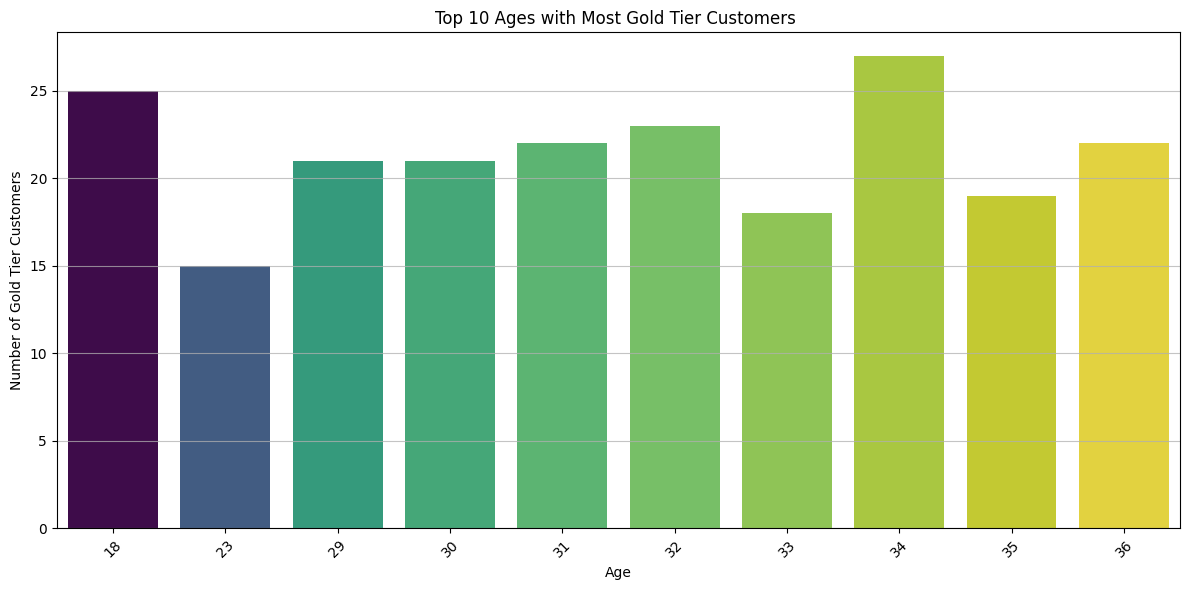

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top N ages with the most gold customers
top_ages = gold_tier_customers_by_age.head(10)

# Sort the top ages by age value (index) in descending order
top_ages_sorted = top_ages.sort_index(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_ages_sorted.index, y=top_ages_sorted.values, hue=top_ages_sorted.index, palette='viridis', legend=False)
plt.title('Top 10 Ages with Most Gold Tier Customers ')
plt.xlabel('Age')
plt.ylabel('Number of Gold Tier Customers')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

BOXPLOT FOR OUTLIERS

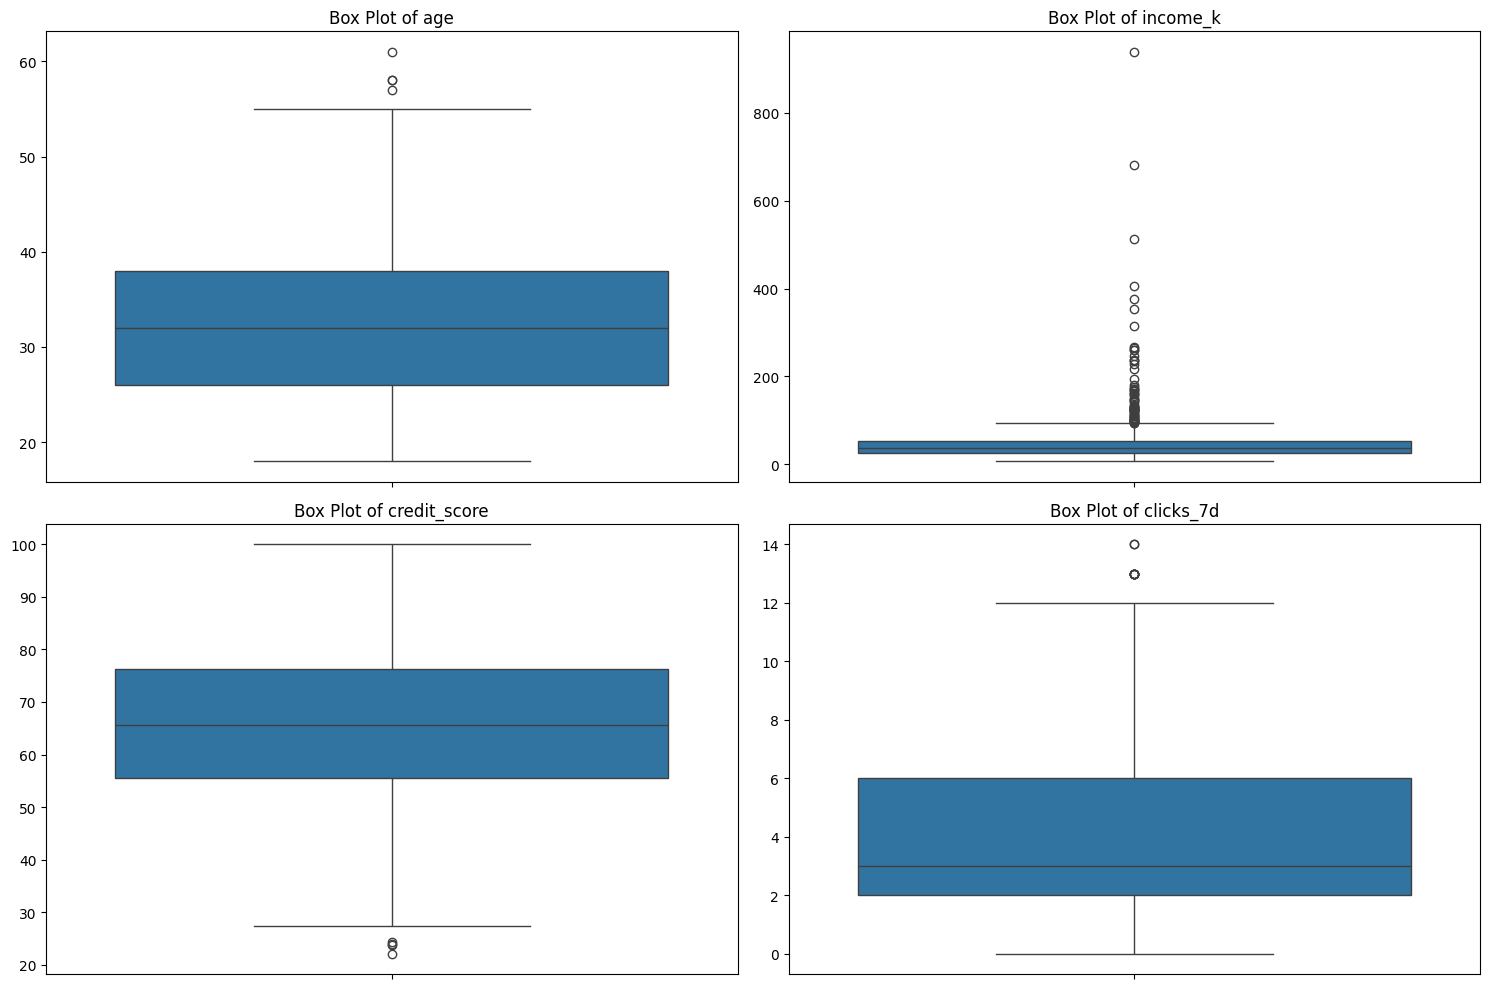

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['age', 'income_k', 'credit_score', 'clicks_7d']


plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') # Remove default y-label as title is sufficient

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['age', 'income_k', 'credit_score', 'clicks_7d']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.scatterplot(x=df.index, y=df[col])
    plt.title(f'Scatter Plot of {col} (Outlier Analysis)')
    plt.xlabel('Index')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

HIG CORRELATION

In [ ]:
numeric_cols = ['age', 'income_k', 'credit_score', 'clicks_7d']
correlation_matrix = df[numeric_cols].corr()
display(correlation_matrix)

,age,income_k,credit_score,clicks_7d
age,1.000000,0.011762,-0.016114,-0.012323
income_k,0.011762,1.000000,-0.013620,-0.055532
credit_score,-0.016114,-0.013620,1.000000,0.002681
clicks_7d,-0.012323,-0.055532,0.002681,1.000000


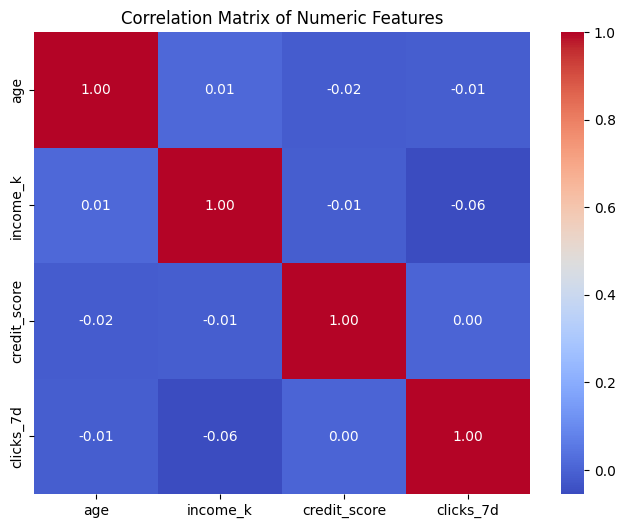

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [ ]:
# Define an ordinal mapping for the 'tier' column
tier_mapping = {
    'Bronze': 0,
    'Silver': 1,
    'Gold': 2
}

# Apply the mapping to create a new numerical 'tier_encoded' column
df['tier_encoded'] = df['tier'].map(tier_mapping)

# Select numerical columns including the newly encoded 'tier'
numeric_cols_with_tier = ['age', 'income_k', 'credit_score', 'clicks_7d', 'tier_encoded']

# Calculate the correlation matrix for these columns
correlation_matrix_with_tier = df[numeric_cols_with_tier].corr()

# Display the correlation of 'tier_encoded' with other features
display(correlation_matrix_with_tier[['tier_encoded']].sort_values(by='tier_encoded', ascending=False))

,tier_encoded
tier_encoded,1.000000
credit_score,0.444516
income_k,0.363984
clicks_7d,0.247468
age,-0.003699


In [ ]:
df

,id,age,income_k,credit_score,clicks_7d,is_premium,email_verified,city,segment,tenure_bucket,device,tier,tier_encoded
0,306,23,47.78,62.5,4,False,True,NaN,B,NaN,Android,Silver,1
1,622,32,55.44,79.5,6,True,True,Kochi,A,NaN,Web,Gold,2
2,704,31,33.81,75.3,4,False,True,Bengaluru,A,3-5y,Android,Gold,2
3,458,24,13.80,78.5,8,False,True,Delhi,D,1-3y,Android,Bronze,0
4,171,26,15.79,75.0,4,False,True,NaN,A,5+y,iOS,Bronze,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,920,18,55.54,57.5,4,True,False,Kochi,C,5+y,Android,Gold,2
1214,212,20,123.79,71.8,4,False,True,Bhopal,D,New,Android,Gold,2
1215,503,26,39.25,80.4,0,False,True,Vizag,D,1-3y,Android,Gold,2
1216,538,42,32.72,58.1,3,False,True,Madurai,B,1-3y,iOS,Silver,1


In [ ]:
df.segment.count()

np.int64(1177)

In [ ]:
# Display unique values and their counts in the 'segment' column to inspect its current state
display(df['segment'].value_counts(dropna=False))

,count
segment,
A,356
C,267
B,265
D,263
E,49


In [ ]:

df['segment'] = df['segment'].str.upper()
display(df['segment'].value_counts(dropna=False))
display(df.head())

,count
segment,
A,356
C,267
B,265
D,263
E,49


,id,age,income_k,credit_score,clicks_7d,is_premium,email_verified,city,segment,tenure_bucket,device,tier,tier_encoded
0,306,23,47.78,62.5,4,False,True,Other,B,1-3y,Android,Silver,1
1,622,32,55.44,79.5,6,True,True,Kochi,A,1-3y,Web,Gold,2
2,704,31,33.81,75.3,4,False,True,Bengaluru,A,3-5y,Android,Gold,2
3,458,24,13.80,78.5,8,False,True,Delhi,D,1-3y,Android,Bronze,0
4,171,26,15.79,75.0,4,False,True,Other,A,5+y,iOS,Bronze,0


In [ ]:
# Display current null counts before filling
display(df.isnull().sum())

,0
id,0
age,0
income_k,0
credit_score,0
clicks_7d,0
is_premium,0
email_verified,0
city,0
segment,0
tenure_bucket,0


In [ ]:

display(df['segment'].value_counts(dropna=False))
display(df.head())

,count
segment,
A,356
C,267
B,265
D,263
E,49


,id,age,income_k,credit_score,clicks_7d,is_premium,email_verified,city,segment,tenure_bucket,device,tier,tier_encoded
0,306,23,47.78,62.5,4,False,True,Other,B,1-3y,Android,Silver,1
1,622,32,55.44,79.5,6,True,True,Kochi,A,1-3y,Web,Gold,2
2,704,31,33.81,75.3,4,False,True,Bengaluru,A,3-5y,Android,Gold,2
3,458,24,13.80,78.5,8,False,True,Delhi,D,1-3y,Android,Bronze,0
4,171,26,15.79,75.0,4,False,True,Other,A,5+y,iOS,Bronze,0


In [ ]:
display(df.dtypes)

,0
id,int64
age,int64
income_k,float64
credit_score,float64
clicks_7d,int64
is_premium,bool
email_verified,bool
city,object
segment,object
tenure_bucket,object


In [ ]:
x=df.drop('tier',axis=1)
y=df['tier']

In [ ]:
print(x)
print(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
#enure_order =['New']

In [ ]:
print(df['tenure_bucket'].value_counts(dropna=False))

tenure_bucket
1-3y    411
New     357
3-5y    237
5+y     195
Name: count, dtype: int64


In [ ]:
tenure_mapping = {
    'New': 0,
    '1-3y': 1,
    '3-5y': 2,
    '5+y': 3
}
print(tenure_mapping)

{'New': 0, '1-3y': 1, '3-5y': 2, '5+y': 3}


In [ ]:
df['tenure_bucket_encoded'] = df['tenure_bucket'].map(tenure_mapping).fillna(-1).astype(int)
display(df[['tenure_bucket', 'tenure_bucket_encoded']].head())

,tenure_bucket,tenure_bucket_encoded
0,1-3y,1
1,1-3y,1
2,3-5y,2
3,1-3y,1
4,5+y,3


**Reasoning**:
To verify the encoding of the 'tenure_bucket' column, I will display the unique values and their counts for the new 'tenure_bucket_encoded' column, and then show the first few rows of the DataFrame with both original and encoded columns.



In [ ]:
print(df['tenure_bucket_encoded'].value_counts(dropna=False))
display(df[['tenure_bucket', 'tenure_bucket_encoded']].head())

tenure_bucket_encoded
1    411
0    357
2    237
3    195
Name: count, dtype: int64


,tenure_bucket,tenure_bucket_encoded
0,1-3y,1
1,1-3y,1
2,3-5y,2
3,1-3y,1
4,5+y,3


## Final Task

### Subtask:
Summarize the ordinal encoding steps performed and confirm the successful transformation of the 'tenure_bucket' column.


## Summary:

### Q&A
*   **Were the ordinal encoding steps performed?** Yes, an explicit ordinal mapping was defined for the 'tenure\_bucket' column, and this mapping was applied to create a new `tenure_bucket_encoded` column.
*   **Was the 'tenure\_bucket' column successfully transformed?** Yes, the `tenure_bucket` column was successfully transformed into a numerical `tenure_bucket_encoded` column, with its values correctly reflecting the defined ordinal mapping. This transformation was verified by examining the unique values and their counts in the new column and by inspecting the head of the DataFrame.

### Data Analysis Key Findings
*   The original `tenure_bucket` column contained four unique categories: '1-3y', 'New', '3-5y', and '5+y', with no missing values identified.
*   An ordinal mapping was explicitly defined as follows: 'New' mapped to 0, '1-3y' to 1, '3-5y' to 2, and '5+y' to 3.
*   A new column, `tenure_bucket_encoded`, was successfully created by applying this defined ordinal mapping to the `tenure_bucket` column.
*   The `tenure_bucket_encoded` column's values were verified to be distinct numerical representations of the original categories: 1 occurred 411 times, 0 occurred 357 times, 2 occurred 237 times, and 3 occurred 195 times, with no missing values.
*   Visual inspection of the DataFrame's head confirmed that categorical values like '1-3y' were correctly encoded as 1, '3-5y' as 2, and '5+y' as 3.

### Insights or Next Steps
*   The newly created `tenure_bucket_encoded` column provides a numerical representation of customer tenure, making it suitable for direct use in machine learning models that require numerical input features.
*   The ordinal relationship established in the encoding ('New' < '1-3y' < '3-5y' < '5+y') can be leveraged in predictive modeling to capture the inherent progression of customer tenure.
